In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import cycler
import numpy as np

In [2]:
import matplotlib.dates as mdates

In [3]:
import datetime as dt

read the data, parse the date and put everything on a dataframe

In [4]:
datapath=Path.cwd()/'data'

In [5]:
assert datapath.is_dir()

In [6]:
paths2csvs = [x for x in datapath.glob('*.csv')]

In [7]:
stats=[]
for path in paths2csvs:
    
    # names of the form covi{day}{month}
    date=path.stem[4:]+'2020'
    
    daystats=pd.read_csv(path)
    daystats['date']=date
    stats.append(daystats)

In [8]:
stats_df = pd.concat(stats)

In [9]:
stats_df.sample()

,ID,CCAA,Casos,IA,UCI,Fallecidos,date,Hospitalizados,Nuevos,Curados
4,948,Canarias,181,8.08,17,3,18032020,NaN,NaN,NaN


In [10]:
# convert to date type
stats_df['date'] = pd.to_datetime(stats_df['date'],format='%d%m%Y')

In [11]:
stats_df.sample()

,ID,CCAA,Casos,IA,UCI,Fallecidos,date,Hospitalizados,Nuevos,Curados
1,936,Aragón,532,39.49,45,24,2020-03-22,241.0,108.0,NaN


In [12]:
color_cycler = (plt.cycler(color=(plt.rcParams['axes.prop_cycle'].by_key()['color'])))
ls_cycle = cycler('ls', ['-', '--',':'])
custom_cycle=color_cycler*ls_cycle

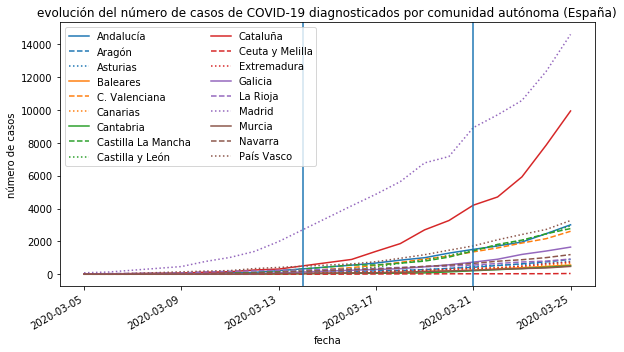

In [16]:
f,a=plt.subplots(figsize=(9,4))
a.set_prop_cycle(custom_cycle)
stats_df.set_index(['date','CCAA'])['Casos'].unstack('CCAA').plot(figsize=(9,5),ax=a);
plt.legend(loc='upper left',ncol=2);
plt.xlabel('fecha')
plt.ylabel('número de casos')
plt.title('evolución del número de casos de COVID-19 diagnosticados por comunidad autónoma (España)');
plt.axvline(pd.Timestamp('2020-03-14'))
plt.axvline(pd.Timestamp('2020-03-21'))
plt.tight_layout()
plt.savefig('n_casos_serietemporal.png',dpi=300)

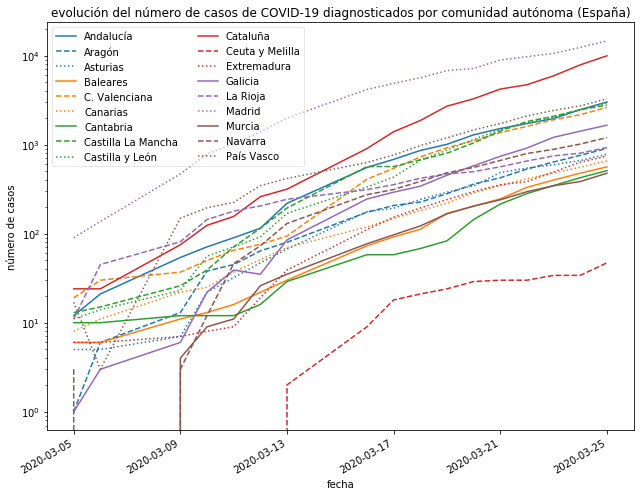

In [14]:
f,a=plt.subplots()
a.set_prop_cycle(custom_cycle)
stats_df.set_index(['date','CCAA'])['Casos'].unstack('CCAA').plot(figsize=(9,7),ax=a);
plt.legend(loc='upper left',ncol=2,framealpha=0.5);
plt.tight_layout()
plt.xlabel('fecha')
plt.ylabel('número de casos')
plt.title('evolución del número de casos de COVID-19 diagnosticados por comunidad autónoma (España)');
plt.yscale('log')
plt.tight_layout()

## Asturias 

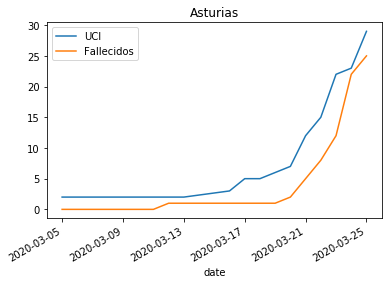

In [15]:
stats_df.loc[stats_df['CCAA']=='Asturias',['UCI','Fallecidos','date']].set_index('date').plot(title='Asturias');